In [264]:
%matplotlib inline

In [265]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sg

In [266]:
#Kernels
identity = np.array([[0., 0., 0.], [0., 1., 0.],[ 0., 0., 0.]])
vertical_edge = np.array([[1., -1.]])
horizontal_edge = np.array([[1.],[-1.]])
edge = np.array([[-1., -1., -1.], [-1., 8., -1.],[ -1., -1., -1.]])
sharpen = np.array([[0., -1., 0.], [-1., 5., -1.],[ 0., -1., 0.]])
gx = np.array([[-1., 0., 1.], [-2., 0., 2.],[ -1., 0., +1.]])
gy = np.array([[1., 2., 1.], [0., 0., 0.],[ -1., -2., -1.]])

kernels = [(vertical_edge, 'Vertical Edges') ,
          (horizontal_edge, 'Horizontal Edges') ,
          (edge, 'Edges') ,
          (sharpen, 'Sharpen'),
          (gx, 'gx'),
          (gy, 'gy'),
          (identity, 'Identity')]

In [267]:
def normalize(input):
    return 255. * np.absolute(input) / np.max(input)

In [268]:
def clip_to_min_size(m1, m2):
    (r1, c1) = m1.shape
    (r2, c2) = m2.shape
    
    r = min(r1, r2)
    c = min(c1, c2)
    
    return m1[0:r, 0:c], m2[0:r, 0:c]

In [269]:
def convolution(fileName):
    img = plt.imread(fileName)
    print "Image Size: ", img.shape
    plt.figure()
    plt.subplot(121)
    plt.title("Original Image")
    plt.imshow(img)
    
    # Dot Prod by [0.299, 0.587, 0.114] makes it Black and White
    bw_img = np.dot(img, [0.299, 0.587, 0.114])
    bw_img_display = 255.*np.absolute(bw_img)/np.max(bw_img)

    print "Grayscale Image Size: ", bw_img.shape
    plt.subplot(122)
    plt.title('Grayscale Image')

    plt.imshow(bw_img_display, cmap = plt.get_cmap('gray'))
    
    plt.figure(figsize = (20,20))
    counter = 1
    dim = np.ceil(len(kernels) / 2.0)
    for kernel, title in kernels:
        plt.subplot(dim * 100 + 2 * 10 + counter)
        output = sg.convolve(bw_img, kernel)
        plt.title(title)
        plt.imshow(normalize(output), cmap=plt.get_cmap('gray'))
        counter += 1
        
    # Gradient Image same as using "edge" kernel
    img_hor = sg.convolve(bw_img, horizontal_edge_kernel)
    img_ver = sg.convolve(bw_img, vertical_edge_kernel)
    img_hor, img_ver = clip_to_min_size(img_hor, img_ver)
    grad = np.sqrt(np.power(img_hor, 2)+np.power(img_ver, 2))
    plt.figure()
    plt.title('Gradient Image')
    grad = 255.*np.absolute(grad)/np.max(grad)
    plt.imshow(grad, cmap=plt.get_cmap('gray'))

Image Size:  (354, 650, 3)
Grayscale Image Size:  (354, 650)


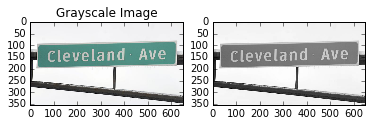

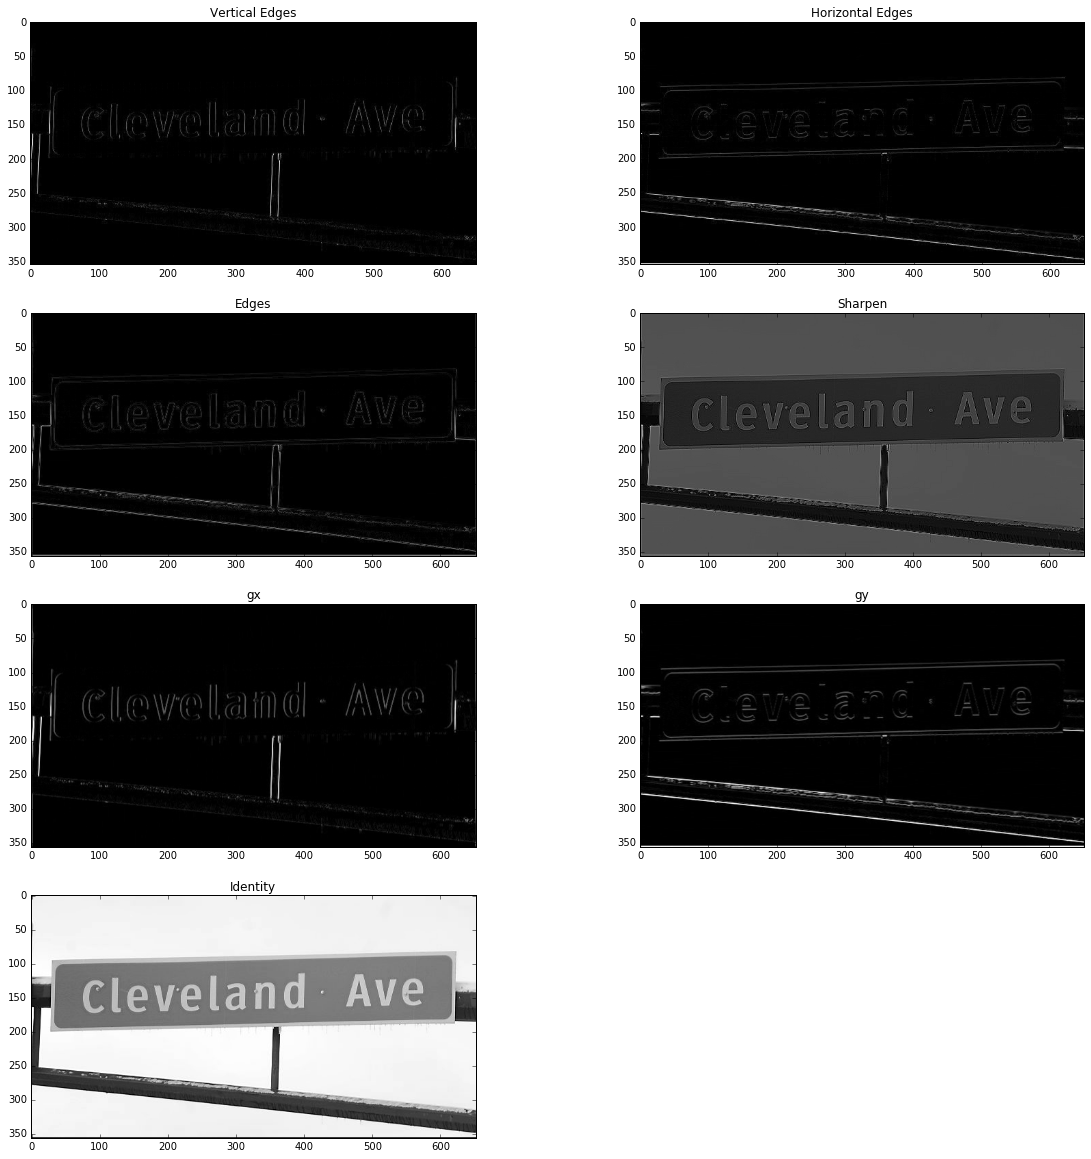

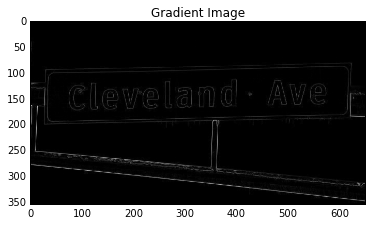

In [270]:
convolution("cleveland.jpg")

Image Size:  (815, 1226, 3)
Grayscale Image Size:  (815, 1226)


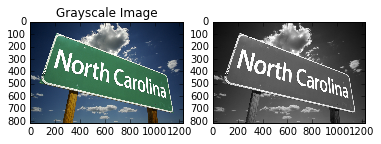

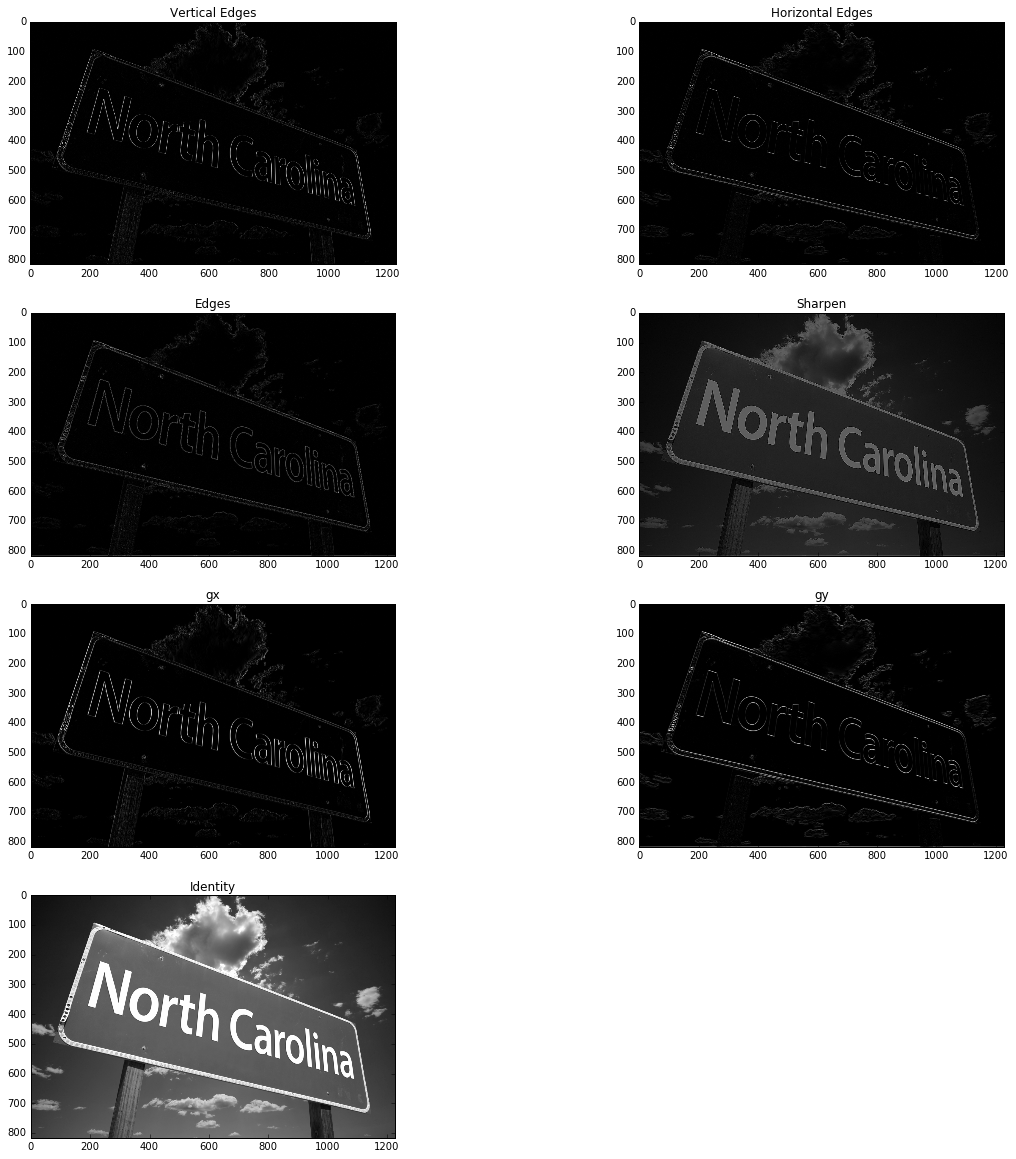

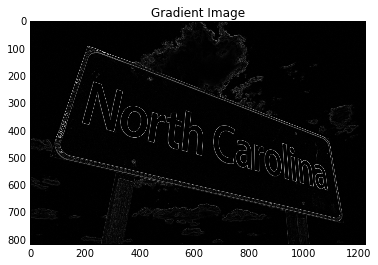

In [271]:
convolution("ncarolina.jpg")

Image Size:  (500, 359, 3)
Grayscale Image Size:  (500, 359)


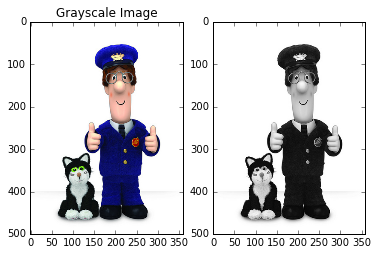

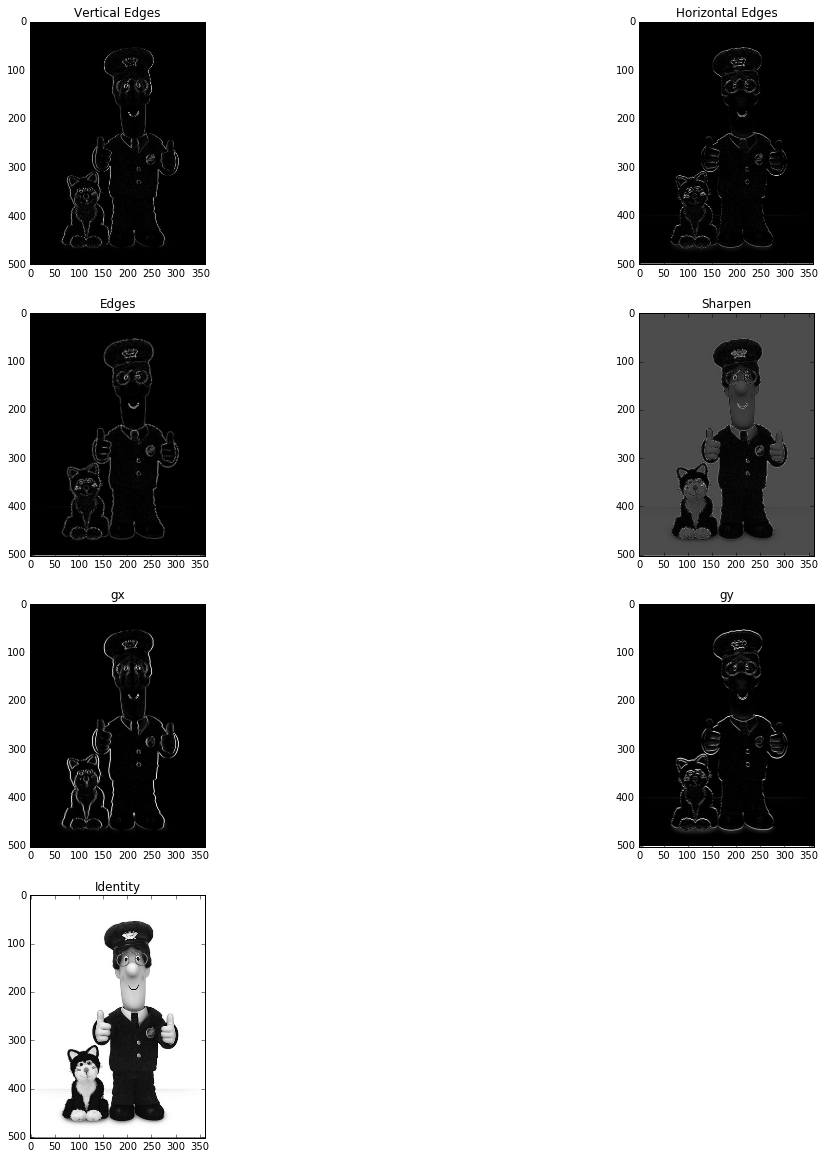

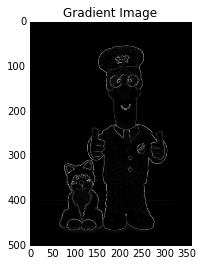

In [272]:
convolution('ppat.jpg')